In [16]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns

In [17]:
dataset = pd.read_csv('Iris.csv')
x = dataset.iloc[:,[1,2,3,4]]
y = dataset.iloc[:,-1]

In [18]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [20]:
for i in range(5):
  print(x[i])

[-0.90068117  1.03205722 -1.3412724  -1.31297673]
[-1.14301691 -0.1249576  -1.3412724  -1.31297673]
[-1.38535265  0.33784833 -1.39813811 -1.31297673]
[-1.50652052  0.10644536 -1.2844067  -1.31297673]
[-1.02184904  1.26346019 -1.3412724  -1.31297673]


In [21]:
from sklearn.decomposition import PCA

# Instantiate the model with hyperparameters
pca = PCA(n_components=2)

# Fit to data and transform. Notice y is not specified!
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA_1', 'PCA_2'])

In [22]:
principalDf.head()

,PCA_1,PCA_2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [23]:
finalDf = pd.concat([principalDf, dataset[['Species']]], axis = 1)

In [24]:
finalDf.head()

,PCA_1,PCA_2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


# [Variance Ratio](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)



In [25]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.72770452 0.23030523]
0.9580097536148197


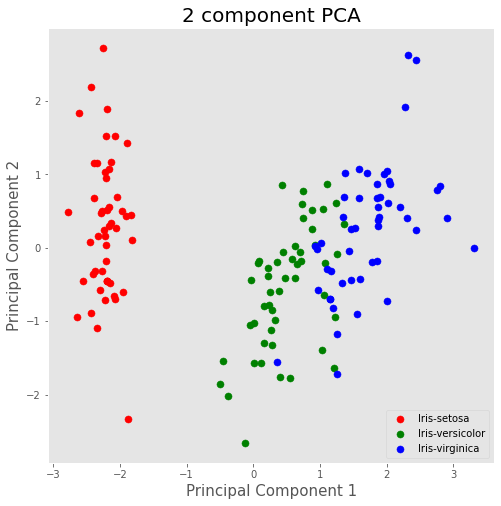

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PCA_1']
               , finalDf.loc[indicesToKeep, 'PCA_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()